# Capstone-Lead score Analysis by Anusha N

## Problem Statement:



##  Background
X Education, an online education platform targeting industry professionals, attracts a significant volume of website traffic through digital marketing, search engines, referrals, and social media. Visitors who show interest by filling out a form with their contact details are classified as *leads*.

Despite acquiring a large number of leads, the company's lead-to-conversion rate is only **30%**, indicating inefficiencies in the lead nurturing process. Sales representatives engage with all leads via emails, phone calls, and other channels, but many of these efforts result in no conversions.

##  Business Objective
The company aims to increase its conversion efficiency by identifying **‘Hot Leads’**—those most likely to become paying customers. By doing so, the sales team can prioritize high-potential leads and avoid wasting time on cold leads. The desired improvement in lead conversion rate is from **30% to around 80%**.

##  Analytical Objective
You are tasked with developing a **logistic regression model** that assigns a **lead score (0 to 100)** to each lead. The score will indicate the probability of a lead converting. The model should be:

- Interpretable by business users
- Scalable for deployment
- Flexible to accommodate future business rule changes

## 📂 Dataset Overview

Source: Provided by X Education, containing historical lead data.

Total Records: 9,240 leads

Total Features (Columns): 37
| Category            | Example Columns                                            |
| ------------------- | ---------------------------------------------------------- |
| **Identifiers**     | `Prospect ID`, `Lead Number` (Dropped during cleaning)     |
| **Lead Origin**     | `Lead Origin`, `Lead Source`                               |
| **Demographics**    | `City`, `Country`, `Do Not Email`, `Do Not Call`           |
| **Course Info**     | `What is your current occupation?`, `Specialization`       |
| **Engagement**      | `Total Time Spent on Website`, `Page Views Per Visit`      |
| **Marketing**       | `Last Activity`, `Last Notable Activity`, `Tags`           |
| **Communication**   | `Email Opened`, `SMS Sent`, `Asymmetrique Activity Score`  |
| **Target Variable** | `Converted` (1 = converted to customer, 0 = not converted) |


## ✅ Deliverables

### 1. Python (Jupyter Notebook)
- Clean, well-commented notebook
- Complete EDA
- Logistic Regression Model
- Model evaluation metrics (Accuracy, Confusion Matrix, ROC-AUC, etc.)
- Lead scoring logic

### 2. Word Document
- Answers to specific business questions provided in the project files

### 3. Presentation (PDF Format)
- Clear business and technical summary
- Visualizations and model results
- Actionable business recommendations

### 4. Summary Report (PDF)
- ~500-word write-up covering:
  - Project approach
  - Key assumptions and challenges
  - Learnings and takeaways

---



## 1.Import libraries

In [6]:
#import libraries
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For splitting data
from sklearn.model_selection import train_test_split

# For preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# For Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# For Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# For Statsmodels (if you need p-values or summary statistics)
import statsmodels.api as sm


## 2. Load Dataset

In [8]:
lead_df=pd.read_csv("Leads.csv")

In [9]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
lead_df.shape

(9240, 37)

In [11]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [12]:
# Checking the summary of the dataset
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [13]:
#checking for missing values percentage
missing_percent=lead_df.isna().mean().sort_values(ascending=False)*100
print(missing_percent)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

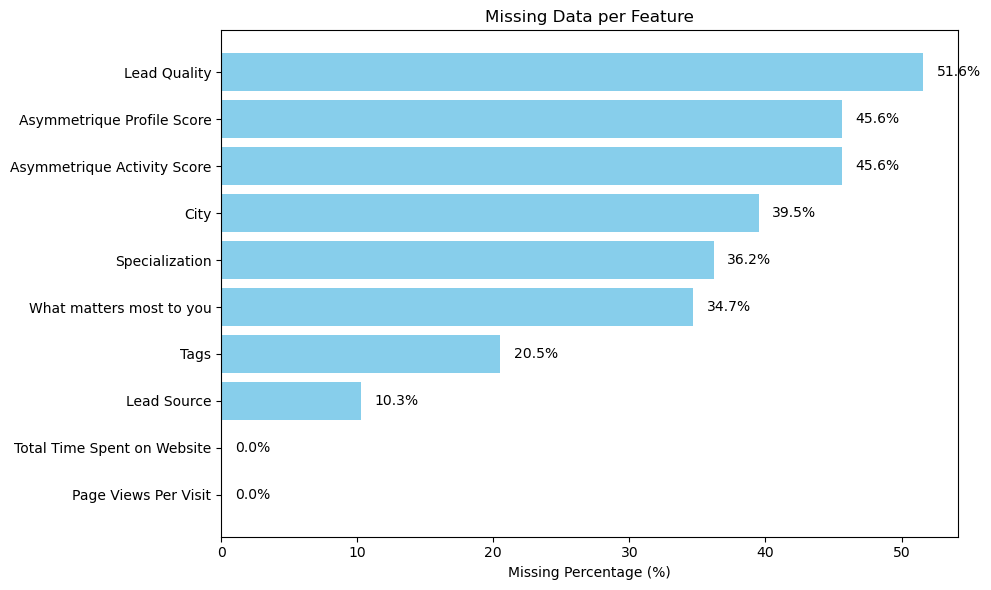

In [27]:


# Example missing data dictionary
missing_data = {
    'Lead Quality': 51.6,
    'Asymmetrique Profile Score': 45.6,
    'Asymmetrique Activity Score': 45.6,
    'City': 39.5,
    'Specialization': 36.2,
    'What matters most to you': 34.7,
    'Tags': 20.5,
    'Lead Source': 10.3,
    'Total Time Spent on Website': 0.0,
    'Page Views Per Visit': 0.0
}

# Convert to DataFrame
missing_df = pd.DataFrame(list(missing_data.items()), columns=['Feature', 'Missing Percentage'])

# Sort by percentage
missing_df.sort_values(by='Missing Percentage', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(missing_df['Feature'], missing_df['Missing Percentage'], color='skyblue')
plt.xlabel('Missing Percentage (%)')
plt.title('Missing Data per Feature')
plt.gca().invert_yaxis()

# Add percentage labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', va='center')

plt.tight_layout()
plt.show()


In [14]:
# Drop columns with more than 45% missing values
threshold = 0.45
cols_to_drop = missing_percent[missing_percent > (threshold * 100)].index
lead_df.drop(columns=cols_to_drop, inplace=True)


In [15]:
#dropping 'Lead Number', 'Prospect ID'
lead_df.drop(columns=['Lead Number', 'Prospect ID'], inplace=True)


In [16]:
lead_df.isna().mean().sort_values(ascending=False)*100

Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Through Recommendations                           0.000000
I agree to pay the amount through cheque          0.0000

In [400]:
# Fill selected categorical columns with 'Unknown'
cat_fill_unknown = ['Tags', 'Lead Profile', 'How did you hear about X Education', 'City']
for col in cat_fill_unknown:
    lead_df[col].fillna('Unknown', inplace=True)

In [401]:
#Converting 'Select' values to NaN.

lead_df = lead_df.replace('Select', np.nan)

In [402]:
lead_df['Country'].value_counts()/len(lead_df['Country'])*100

Country
India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switze

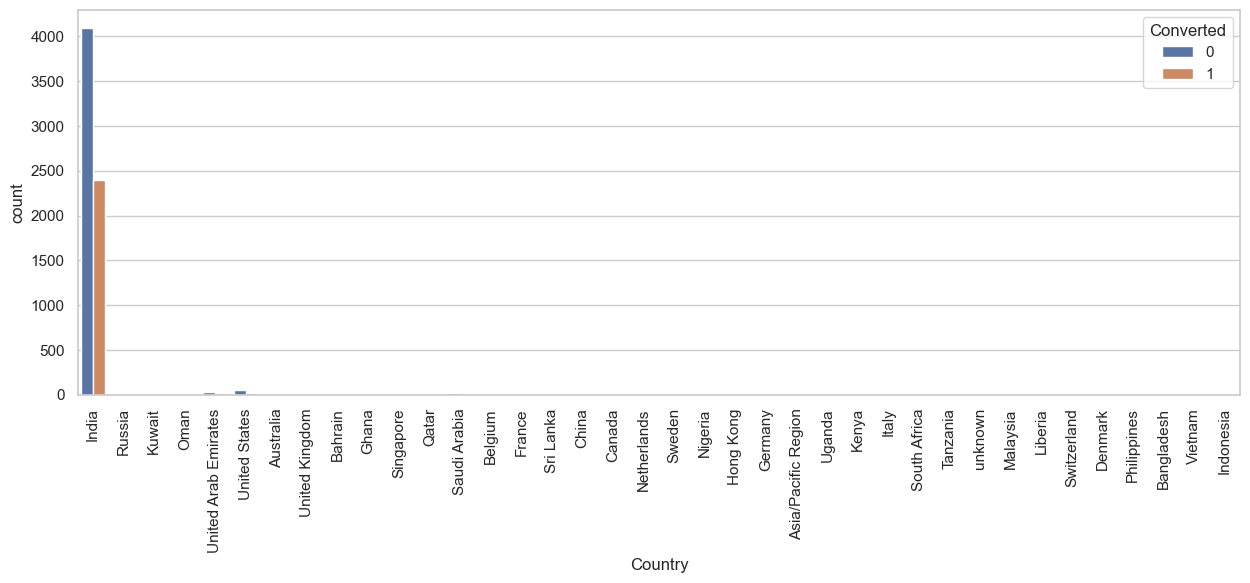

In [403]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
sns.countplot(data=lead_df,x=lead_df.Country, hue=lead_df.Converted)
plt.xticks(rotation=90)
plt.show()

In [404]:
#dropping country as >70% has country As India
lead_df=lead_df.drop("Country", axis=1)

In [405]:
# Fill selected categorical columns with mode
cat_fill_mode = ['Specialization', 'What is your current occupation',  'Last Activity', 'Lead Source',"Lead Profile"]
for col in cat_fill_mode:
    lead_df[col].fillna(lead_df[col].mode()[0], inplace=True)

# Fill selected numerical columns with median
num_fill_median = ['TotalVisits', 'Page Views Per Visit']
for col in num_fill_median:
    lead_df[col].fillna(lead_df[col].median(), inplace=True)

In [406]:
lead_df.isna().mean().sort_values(ascending=False)*100

How did you hear about X Education               54.577922
What matters most to you in choosing a course    29.318182
City                                             24.339827
Lead Origin                                       0.000000
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
I agree to pay the amount through cheque          0.000000
Lead Profile                                      0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Tags                                              0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [407]:
lead_df["Lead Profile"].value_counts()

Lead Profile
Unknown                        6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [408]:
#Lead Profile has high missing/unknown data which is not helpful for analysis
lead_df.drop(["Lead Profile"],axis=1,inplace=True)


In [409]:
lead_df["City"].value_counts()

City
Mumbai                         3222
Unknown                        1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

Mumbai has highest numbers of leads

As you might be able to interpret, the variable City won't be of any use in our analysis. So it's best that we drop it

In [411]:
# dropping the "City" feature
lead_df.drop(['City'], axis = 1, inplace = True)

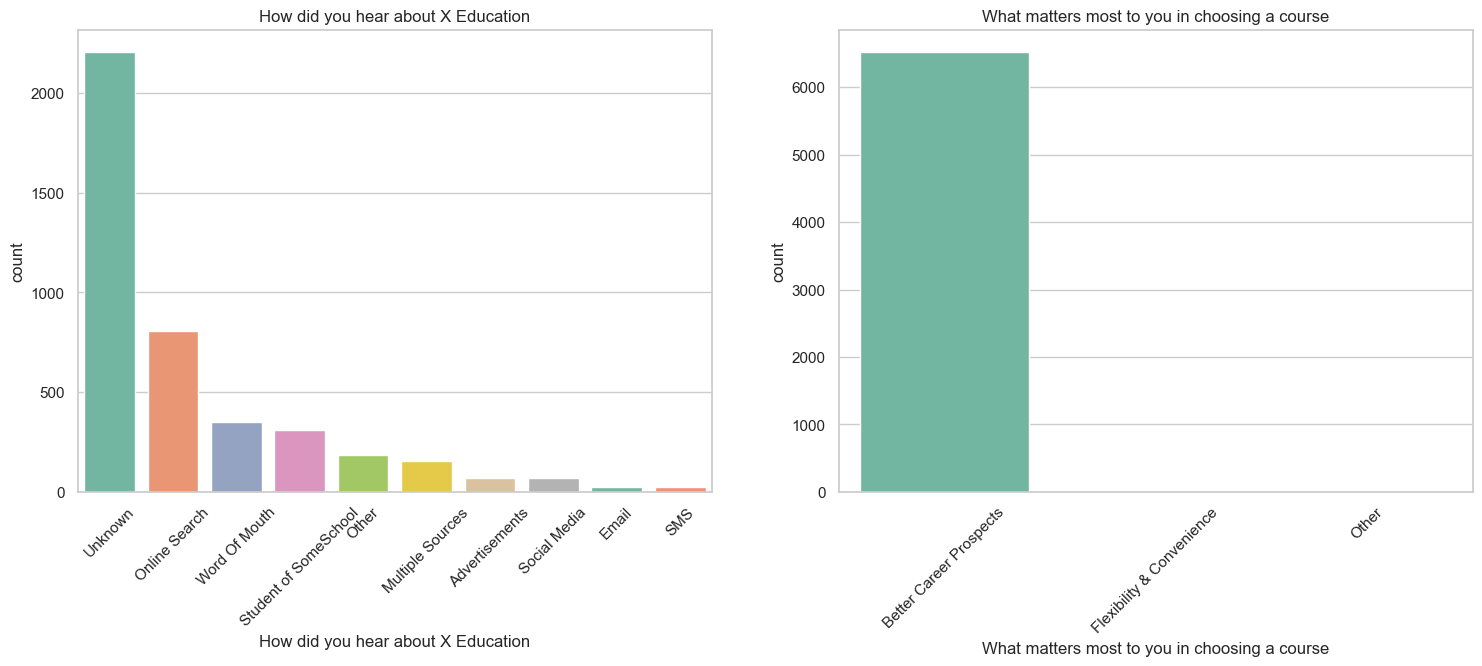

In [412]:
columns = [
    "How did you hear about X Education",
    "What matters most to you in choosing a course"
]

# Plot setup
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Loop through columns and plot
for i, col in enumerate(columns):
    sns.countplot(
        data=lead_df,
        x=col,
        order=lead_df[col].value_counts().index,
        ax=axes[i],
        palette="Set2"
    )
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

it can be seen that the levels of "Lead Profile" and "How did you hear about X Education" have a lot of rows which have the value Select which is of no use to the analysis

So it's best that we drop them.

In [414]:
lead_df.drop([
    "How did you hear about X Education",
    "What matters most to you in choosing a course"
],axis=1,inplace=True)


In [415]:
lead_df.isna().mean().sort_values(ascending=False)*100

Lead Origin                                 0.0
Newspaper Article                           0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Magazine                                    0.0
Lead Source                                 0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                             

In [416]:
lead_df.shape

(9240, 25)

## Standardising values

In [418]:
#to check values present in different featues

for column in lead_df.columns:
    print(f"\nValue counts for column: {column}")
    print(lead_df[column].value_counts(dropna=False))



Value counts for column: Lead Origin
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

Value counts for column: Lead Source
Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

Value counts for column: Do Not Email
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

Value counts for column: Do Not Call
Do

In [419]:
#Lead Scource column
# Step 1: Clean up casing and whitespace in 'Lead Source'
lead_df['Lead Source'] = lead_df['Lead Source'].astype(str).str.strip().str.lower()

# Step 2: Define replacements to merge similar or inconsistent values
lead_source_clean_map = {
    'google': 'Google',
    'gogle': 'Google',
    'welearnblog_home': 'WeLearn',
    'welearn': 'WeLearn',
    'nc_edm': 'Email Campaign',
    'email': 'Email Campaign',
    'welingak website': 'Welingak Website',
    'referral sites': 'Referral Sites',
    'reference': 'Referral Sites',
    
}

# Step 3: Replace using the mapping
lead_df['Lead Source'] = lead_df['Lead Source'].replace(lead_source_clean_map)

# Step 4: Convert values to title case for presentation
lead_df['Lead Source'] = lead_df['Lead Source'].str.title()

# Step 5: Show cleaned value counts
print("\n✅ Standardized Value Counts for 'Lead Source':")
print(lead_df['Lead Source'].value_counts(dropna=False))



✅ Standardized Value Counts for 'Lead Source':
Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Referral Sites        659
Welingak Website      142
Facebook               55
Bing                    6
Click2Call              4
Social Media            2
Welearn                 2
Live Chat               2
Press_Release           2
Pay Per Click Ads       1
Blog                    1
Youtubechannel          1
Testone                 1
Email Campaign          1
Name: count, dtype: int64


In [420]:
# Step 1: Clean whitespace and lowercase for consistent matching
lead_df['Specialization'] = lead_df['Specialization'].astype(str).str.strip().str.lower()

# Step 2: Replace only duplicates and 'select'
specialization_clean_map = {
    'select': np.nan,
    'e-commerce': 'E-Commerce',
    'ecommerce': 'E-Commerce',
    'e-business': 'E-Business',
}

# Step 3: Apply mapping
lead_df['Specialization'] = lead_df['Specialization'].replace(specialization_clean_map)

# Step 4: Title-case everything for clean presentation
lead_df['Specialization'] = lead_df['Specialization'].str.title()

# Step 5: Show cleaned value counts
print("\n✅ Cleaned Value Counts for 'Specialization':")
print(lead_df['Specialization'].value_counts(dropna=False))


✅ Cleaned Value Counts for 'Specialization':
Specialization
Finance Management                   4356
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
It Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media And Advertising                 203
Travel And Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-Commerce                            112
Retail Management                     100
Rural And Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64


In [421]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Finance Management,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Finance Management,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media And Advertising,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Finance Management,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


## Analysis

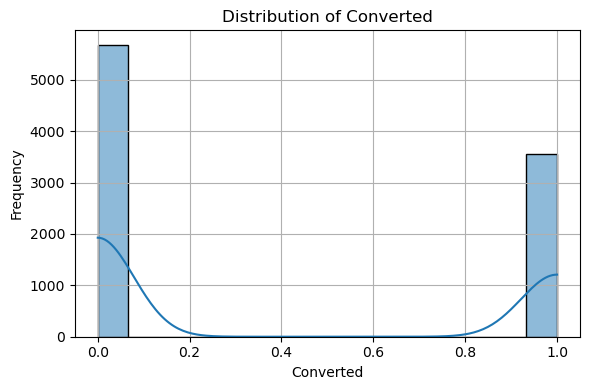

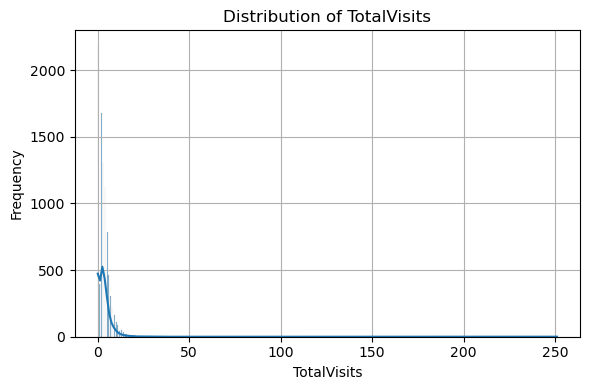

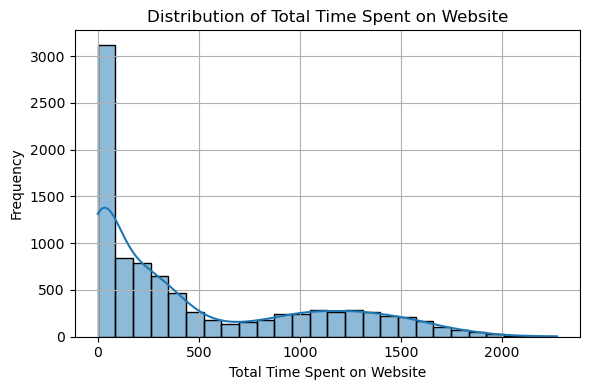

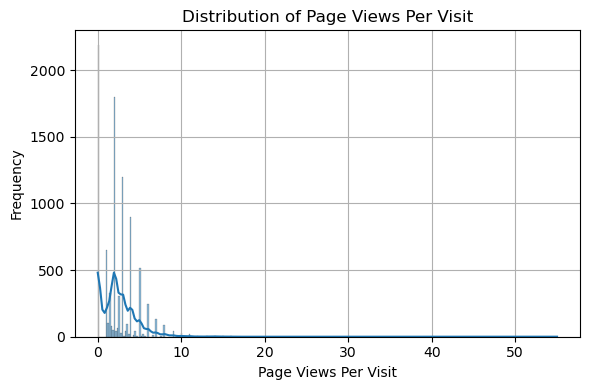

In [30]:
# Univariate analysis for numeric columns
num_cols = lead_df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(lead_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


only 30% of the people converted


**TotalVisits**
Highly right-skewed distribution.

Majority of leads visited fewer than 10 times.

Few extreme outliers with very high visit counts.

Consider outlier treatment (e.g., capping or log transformation).

**Total Time Spent on Website**
Right-skewed but more spread out than TotalVisits.

Most leads spend low to moderate time on the website.

Small peak around 1000–1600 seconds suggests engaged users.

Can be useful directly or after binning.

**Page Views Per Visit**
Sharp right-skew; most leads have fewer than 5 views per visit.

Presence of outliers beyond 10–15 views.

May need outlier handling or categorization.

In [32]:
lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Binary feature analysis

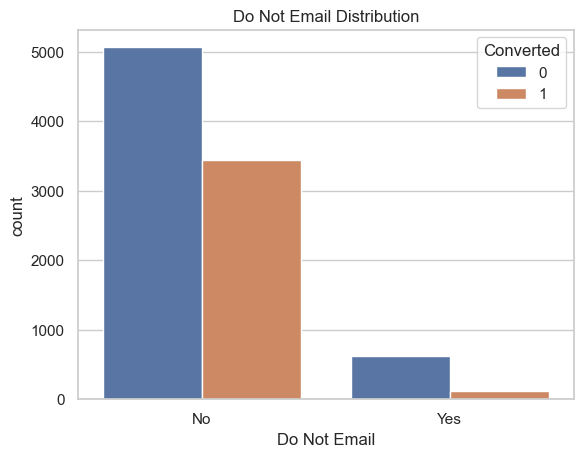

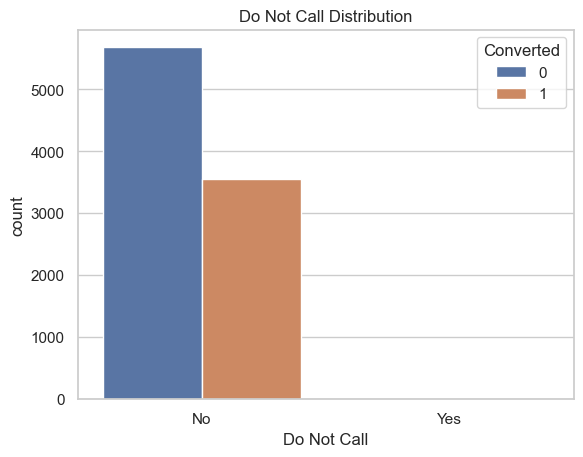

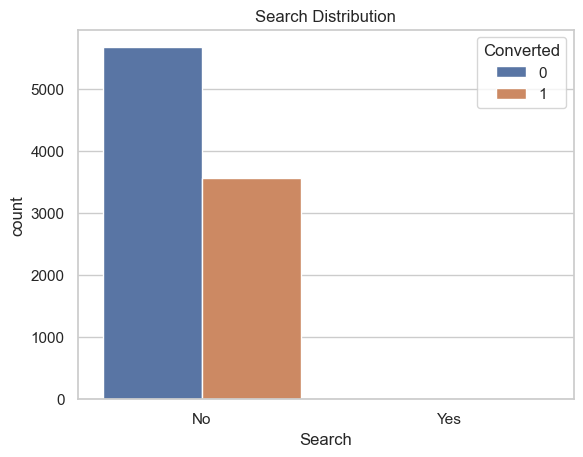

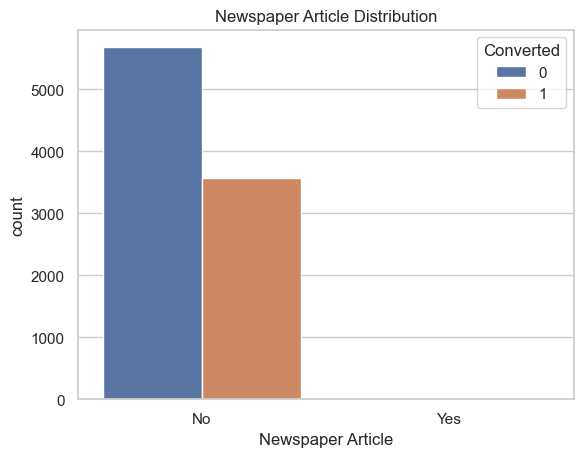

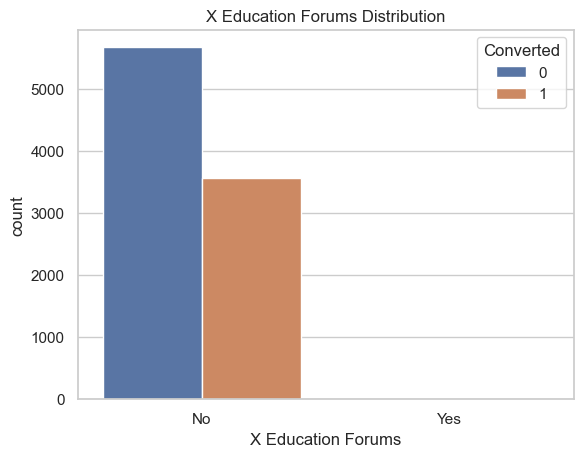

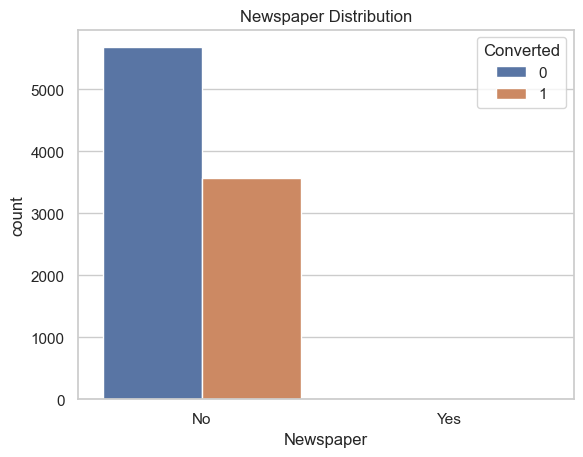

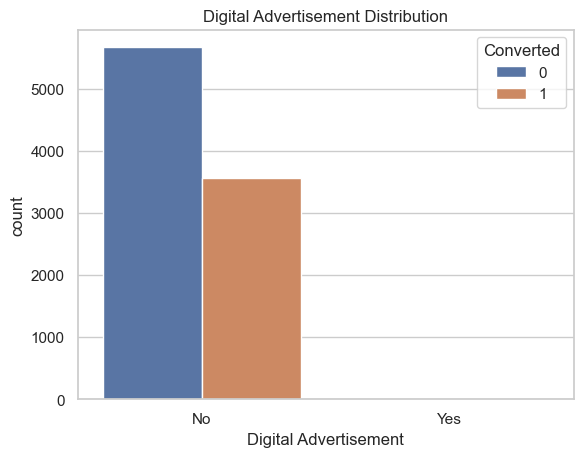

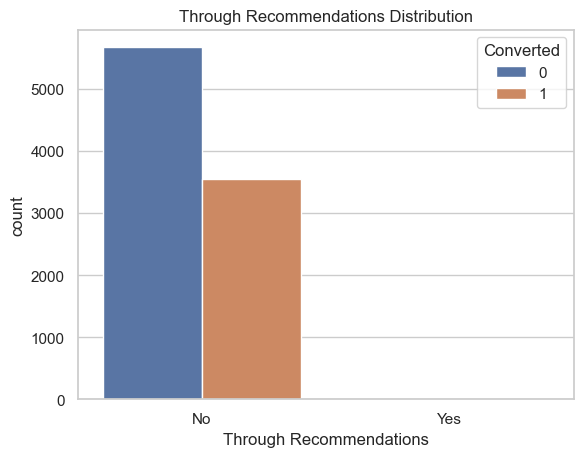

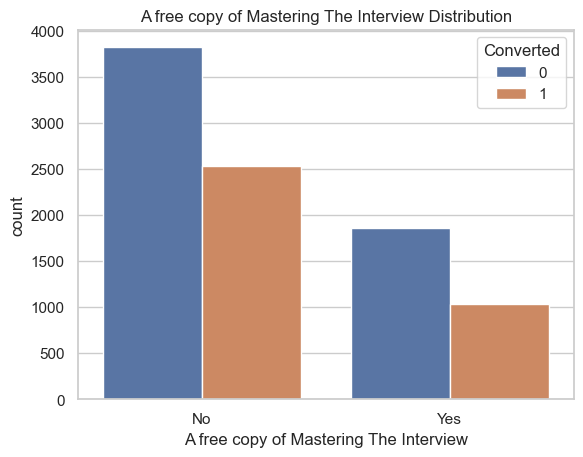

In [427]:
# Binary columns with exactly 2 unique values (excluding NaNs)
binary_columns = ['Do Not Email',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']
for col in binary_columns:
    sns.countplot(data=lead_df,hue=lead_df.Converted, x=col)
    plt.title(f'{col} Distribution')
    plt.show()


### 📊 Binary Features Summary

| Feature | Dominant Value | Minority Value | Remarks |
|--------|----------------|----------------|---------|
| **Do Not Email** | No (92%) | Yes (8%) | Most leads allow email communication. Important for outreach. |
| **Do Not Call** | No (99.98%) | Yes (<0.1%) | Almost all leads are open to calls. Little variation. |
| **Search** | No (99.85%) | Yes (0.15%) | Very few users performed a search. Rare behavior. |
| **Magazine** | No (100%) | — | Not used as a marketing channel. Can be dropped. |
| **Newspaper Article** | No (99.98%) | Yes (<0.1%) | Very low impact. Consider dropping. |
| **X Education Forums** | No (99.99%) | Yes (<0.01%) | Negligible use. Can be dropped. |
| **Newspaper** | No (99.99%) | Yes (<0.01%) | Almost no leads came via this channel. |
| **Digital Advertisement** | No (99.96%) | Yes (<0.05%) | Rarely used marketing source. |
| **Through Recommendations** | No (99.92%) | Yes (<0.1%) | Very few referrals. |
| **Receive More Updates About Our Courses** | No (100%) | — | No opt-ins recorded. Likely obsolete. |
| **Update me on Supply Chain Content** | No (100%) | — | No responses. Safe to remove. |
| **Get updates on DM Content** | No (100%) | — | Not utilized by any leads. |
| **I agree to pay the amount through cheque** | No (100%) | — | Obsolete field. Can be ignored. |
| **A free copy of Mastering The Interview** | No (69%) | Yes (31%) | Moderately popular. May indicate lead interest. |

---

### ✅ Recommendations

- **Keep**: `Do Not Email`, `A free copy of Mastering The Interview` (important engagement indicators).
- **Drop**: Features with 100% "No" or <1% "Yes" (e.g., `Magazine`, `X Education Forums`, `Digital Advertisement`, etc.) to reduce noise.


In [429]:
# List of binary columns to drop based on EDA
cols_to_drop = [
    'Magazine',
    'Newspaper Article',
    'X Education Forums',
    'Newspaper',
    'Digital Advertisement',
    'Through Recommendations',
    'Receive More Updates About Our Courses',
    'Update me on Supply Chain Content',
    'Get updates on DM Content',
    'I agree to pay the amount through cheque'
]

# Drop the columns from the DataFrame
lead_df.drop(columns=cols_to_drop, inplace=True)

# Confirm removal
print(f"Dropped {len(cols_to_drop)} low-variance binary columns.")


Dropped 10 low-variance binary columns.


In [430]:
lead_df.shape

(9240, 15)

## Categorical column Analysis

In [58]:
categorical_cols = [
    'Lead Origin',
    'Lead Source',
    'Last Activity',
    'Specialization',
    'What is your current occupation',
    'Tags',
    'Last Notable Activity'
]


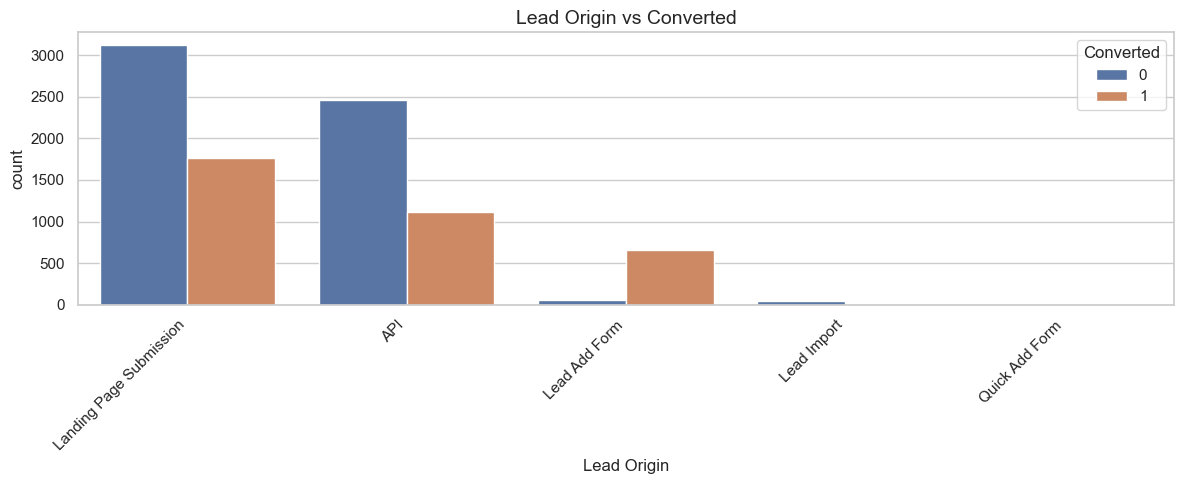

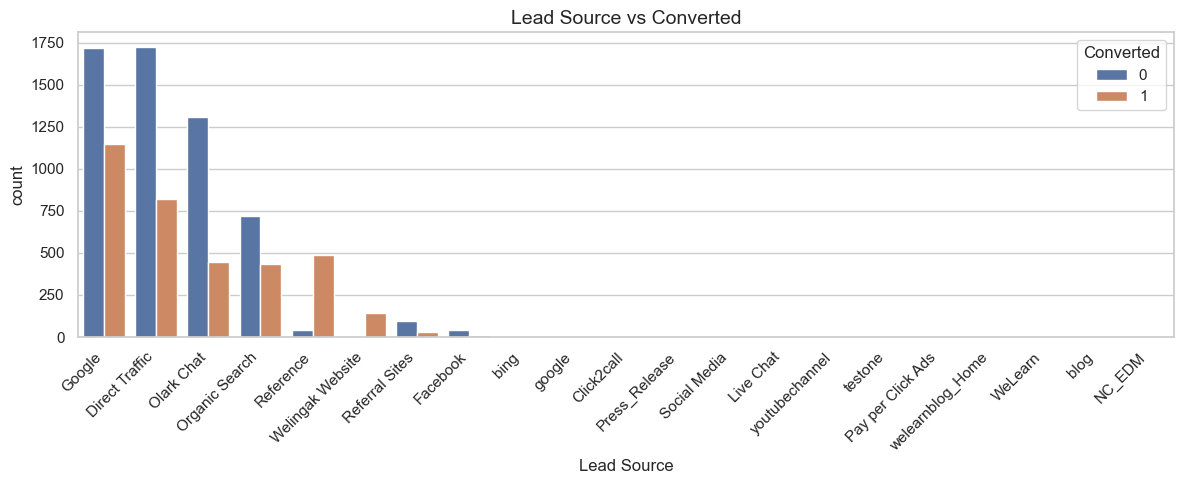

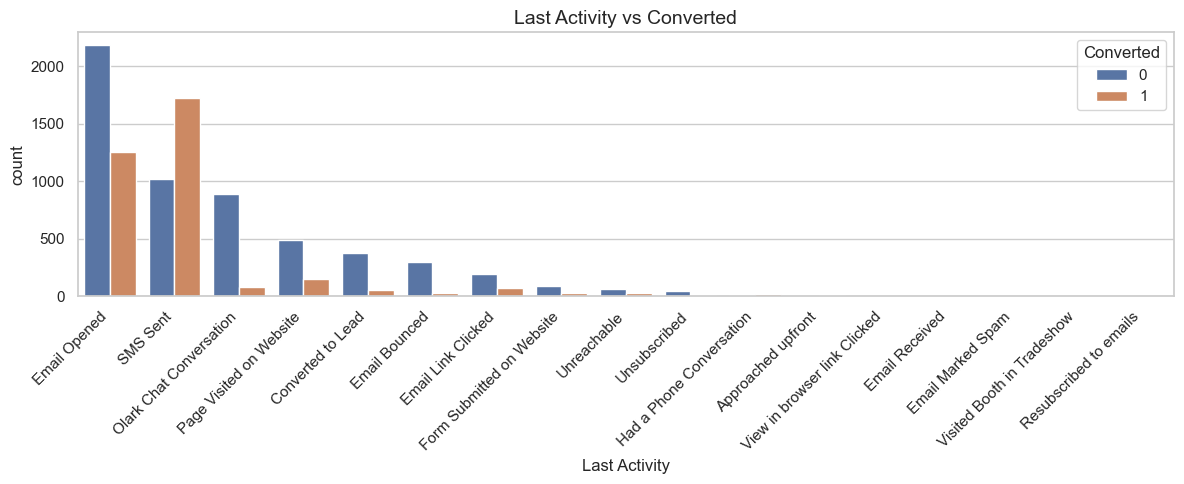

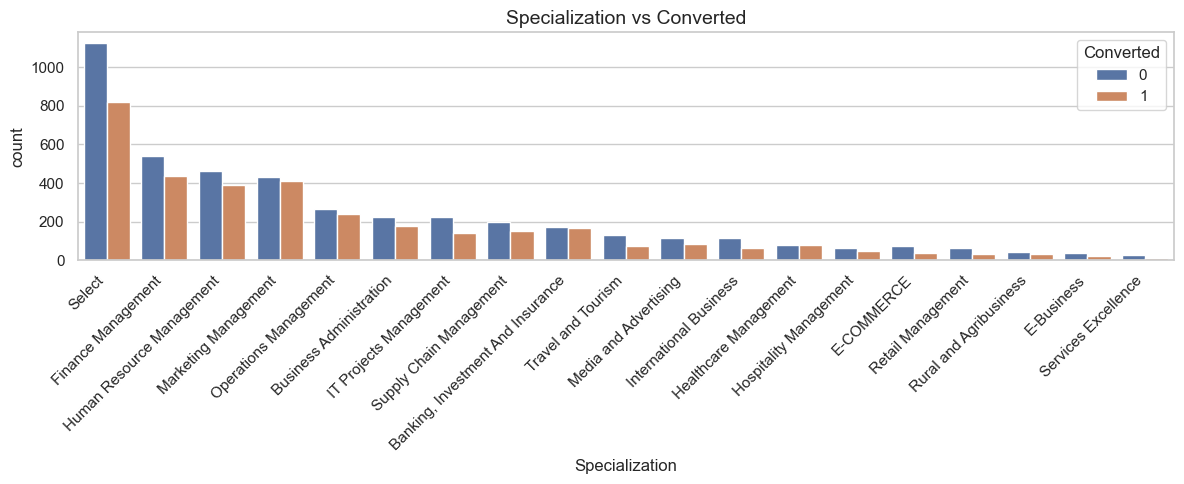

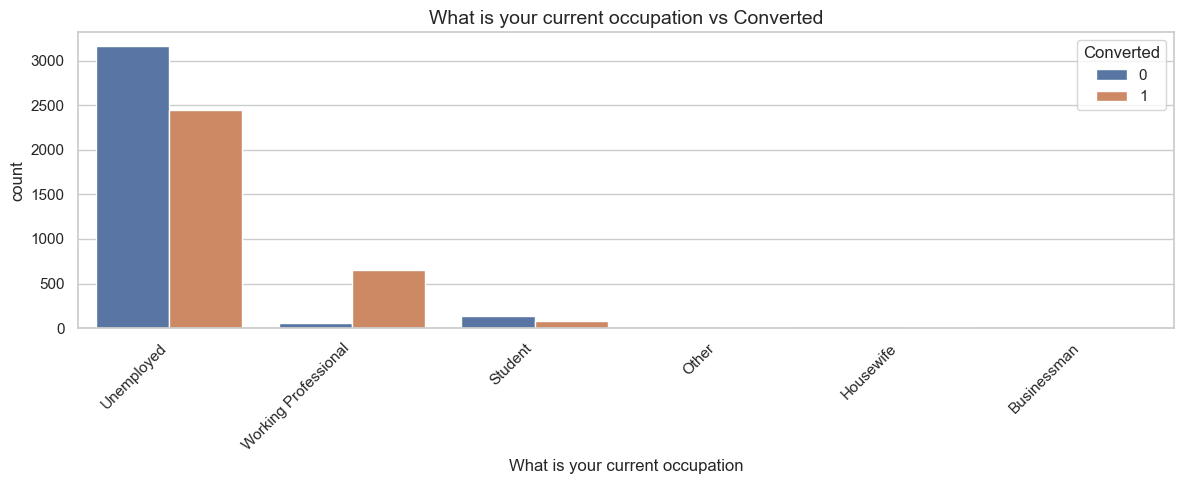

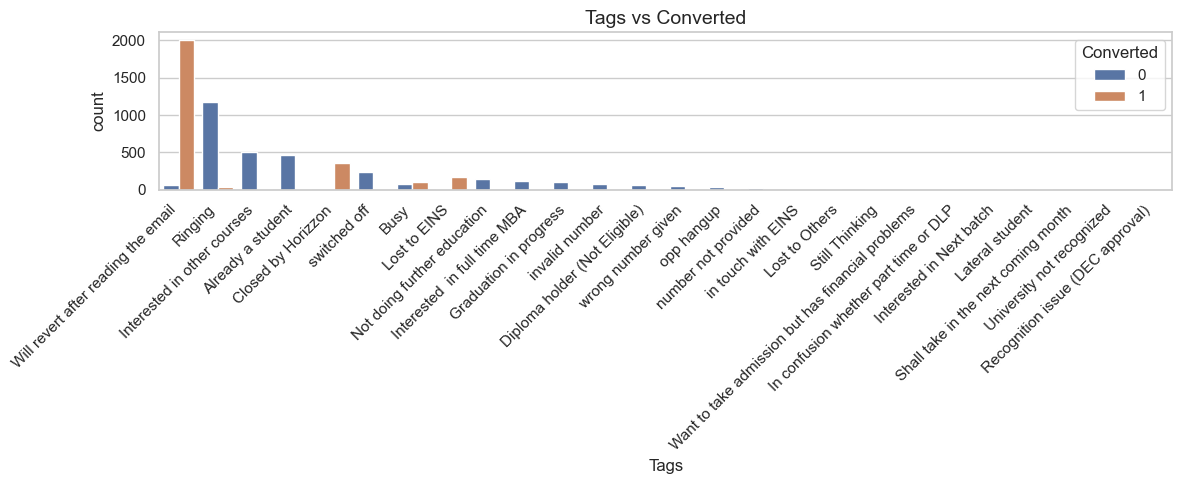

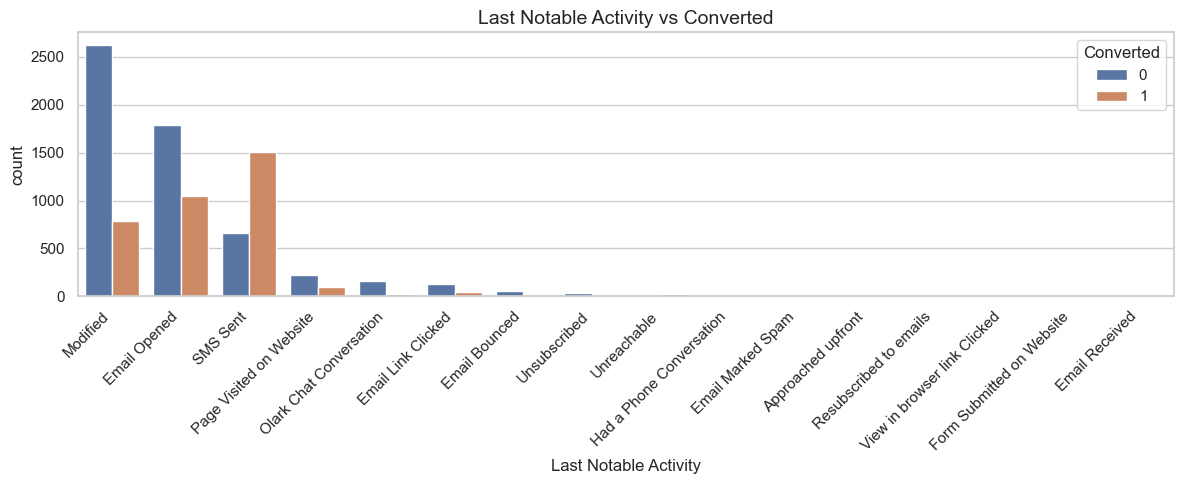

In [60]:
## countplot to analyse categorical data 
# Set the plot style
sns.set(style="whitegrid")

# Loop through and plot
for col in categorical_cols:
    plt.figure(figsize=(12, 5))
    sns.countplot(data=lead_df, x=col, hue='Converted', order=lead_df[col].value_counts().index)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{col} vs Converted', fontsize=14)
    plt.tight_layout()
    plt.show()

### 📈 Categorical Feature Analysis Summary (with hue = Converted)

- **Lead Origin**:
  - *Landing Page Submission* and *API* bring in the highest number of leads.
  - These also show **higher conversion rates**, indicating effective acquisition channels.

- **Lead Source**:
  - *Google*, *Direct Traffic*, *Olark Chat*, *Organic Search*, and *Referral Sites* are the top traffic sources.
  - Among them, **Google**, **Referral Sites**, and **Direct Traffic** contribute to **higher conversions**.

- **Last Activity**:
  - Leads who **opened emails** or **received SMS** are more likely to convert.
  - These activities indicate higher engagement and intent.

- **Specialization**:
  - *Finance Management* has the highest number of leads.
  - Could be due to broader interest or better campaign targeting.

- **What is your current occupation**:
  - Most leads are **working professionals**, and they show **higher interest** in courses.

- **Tags**:
  - The tag **"Will revert after reading the email"** is strongly associated with conversions.
  - Indicates positive intent and email-driven engagement.

- **Last Notable Activity**:
  - *SMS Sent* appears most frequently as the last touchpoint before conversion.
  - May act as a final nudge to convert leads.

---
 **Actionable Insights**:
- Focus marketing on high-performing sources: Google, Direct, Referral.
- Continue SMS and email engagement for lead nurturing.
- Prioritize working professionals and finance-focused campaigns.


## Outlier Analysis

In [436]:
num_col= ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
    # Repeat IQR steps and boxplots for each column


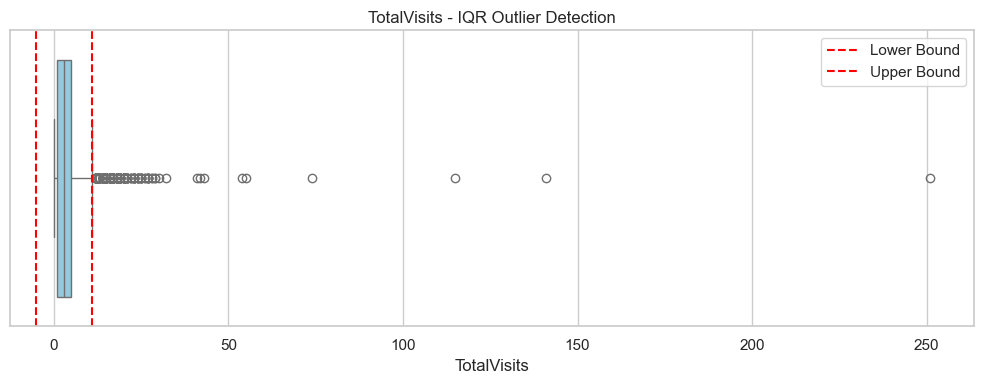

Column: TotalVisits
Lower Bound: -5.00, Upper Bound: 11.00
Outliers: 267 (2.89%)



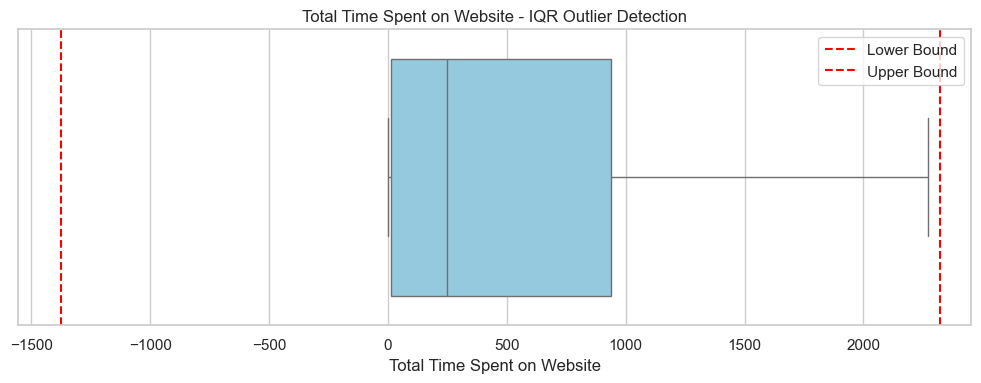

Column: Total Time Spent on Website
Lower Bound: -1374.00, Upper Bound: 2322.00
Outliers: 0 (0.00%)



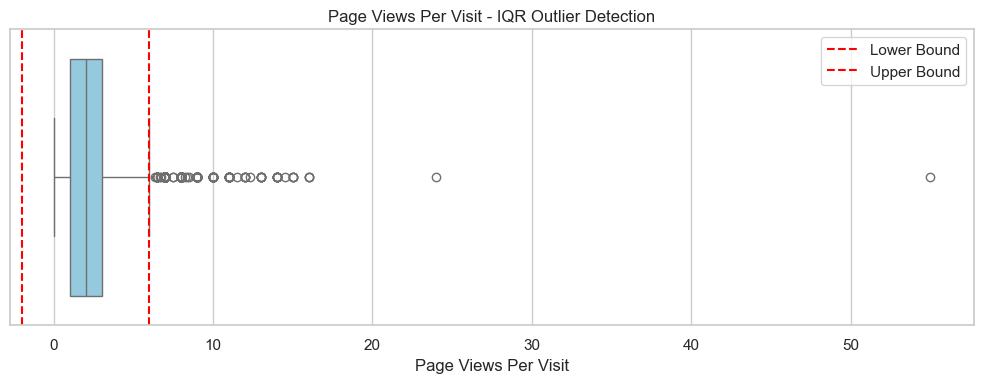

Column: Page Views Per Visit
Lower Bound: -2.00, Upper Bound: 6.00
Outliers: 360 (3.90%)



In [62]:


# List of numeric columns to analyze
num_col = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Loop through each column
for col in num_col:
    # Step 1: Calculate IQR
    Q1 = lead_df[col].quantile(0.25)
    Q3 = lead_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Step 2: Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Step 3: Identify outliers
    outliers = lead_df[(lead_df[col] < lower_bound) | (lead_df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(lead_df)) * 100

    # Step 4: Boxplot with outlier bounds
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=lead_df, x=col, color='skyblue')
    plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
    plt.title(f'{col} - IQR Outlier Detection')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Step 5: Print summary
    print(f"Column: {col}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Outliers: {outlier_count} ({outlier_percent:.2f}%)\n")


In [438]:
# IQR Capping for Outliers


for col in num_col:
    # Step 1: Calculate IQR
    Q1 = lead_df[col].quantile(0.25)
    Q3 = lead_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Step 2: Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Step 3: Cap the values
    lead_df[col] = lead_df[col].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )

    print(f'Capped outliers in {col}:')
    print(f' - Lower bound: {lower_bound:.2f}')
    print(f' - Upper bound: {upper_bound:.2f}\n')


Capped outliers in TotalVisits:
 - Lower bound: -5.00
 - Upper bound: 11.00

Capped outliers in Total Time Spent on Website:
 - Lower bound: -1374.00
 - Upper bound: 2322.00

Capped outliers in Page Views Per Visit:
 - Lower bound: -2.00
 - Upper bound: 6.00



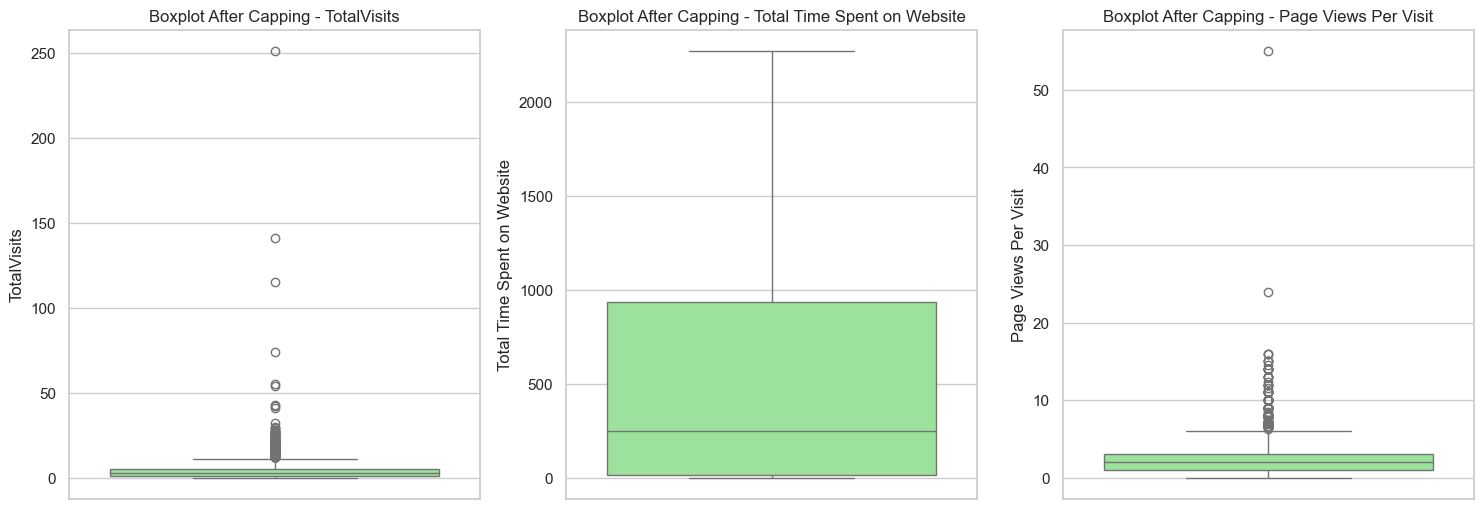

In [80]:
# Plot boxplots after capping
plt.figure(figsize=(15, 5 * len(num_col)))

for i, col in enumerate(num_col, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=lead_df, y=col, color='lightgreen')
    plt.title(f'Boxplot After Capping - {col}')
    plt.tight_layout()

plt.show()

## Feature Engineering

Engagement Score
Formula:
Engagement Score = Total Time Spent on Website (minutes) + TotalVisits + Page Views Per Visit


Individually, these features offer partial insights into user behavior.
Combined, they form a more holistic view of lead engagement with the platform.

📌 Visit/Page Ratio
Formula:
Visit_Page_Ratio = TotalVisits / Page Views Per Visit


Helps assess navigation behavior:

High ratio → frequent but shallow visits

Low ratio → fewer but deeper interactions

### Engagement Score

In [87]:
lead_df['Engagement_Score'] = (
    lead_df['TotalVisits'] +
    lead_df['Page Views Per Visit'] +
    (lead_df['Total Time Spent on Website'] / 60)  # convert time to minutes
)


###  Visit-to-Page Ratio

In [444]:
lead_df['Visit_Page_Ratio'] = (
    lead_df['Page Views Per Visit'] / (lead_df['TotalVisits'] + 1)
)


## Encoding

In [446]:
# Define column groups based on your current DataFrame
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
binary_cols = ['Do Not Email', 'Do Not Call', 'Search', 'A free copy of Mastering The Interview']
cat_cols = [
    'Lead Origin', 'Lead Source', 'Last Activity',
    'Specialization', 'What is your current occupation',
    'Tags', 'Last Notable Activity'
]
target = 'Converted'
derived_cols = ['Engagement_Score', 'Visit_Page_Ratio']

In [447]:
# Encode binary columns safely (handle NaNs)
for col in binary_cols:
    lead_df[col] = lead_df[col].map({'Yes': 1, 'No': 0})

    # Optionally: Fill missing with 0 or a new category (depends on context)
    lead_df[col] = lead_df[col].fillna(0).astype(int)


In [448]:
# Fill missing categorical values with 'Unknown'
lead_df[cat_cols] = lead_df[cat_cols].fillna('Unknown')

# Fill missing numeric values with median
lead_df[num_cols] = lead_df[num_cols].fillna(lead_df[num_cols].median())


In [449]:
lead_df[cat_cols].isnull().sum()

Lead Origin                        0
Lead Source                        0
Last Activity                      0
Specialization                     0
What is your current occupation    0
Tags                               0
Last Notable Activity              0
dtype: int64

In [450]:
# One-hot encode only the categorical columns
lead_df_encoded = pd.get_dummies(lead_df, columns=cat_cols, drop_first=True)

# Optional: Convert dummy columns to int (if needed)
# Identify dummy columns (they are all object or uint8 after get_dummies)
dummy_cols = lead_df_encoded.columns.difference(lead_df.columns)

# If you really want all dummies to be integers (not necessary for modeling though):
lead_df_encoded[dummy_cols] = lead_df_encoded[dummy_cols].astype(int)



## Scaling

In [452]:
# Standardize numeric features
scaler = StandardScaler()
lead_df_encoded[num_cols] = scaler.fit_transform(lead_df_encoded[num_cols])

In [453]:
lead_df_encoded.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,Engagement_Score,Visit_Page_Ratio,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,-1.124849,-0.889974,-1.267358,0,0,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0.623209,0.339972,0.137630,0,0,18.733333,0.416667,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,-0.425626,1.905689,-0.143368,0,1,29.533333,0.666667,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,-0.775238,-0.333396,-0.705363,0,0,7.083333,0.500000,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,-0.425626,1.715905,-0.705363,0,0,26.800000,0.333333,...,0,0,1,0,0,0,0,0,0,0


## Train-Test Split & Logistic Regression Model Building:

In [455]:
X = lead_df_encoded.drop(columns=['Converted'])
y = lead_df_encoded['Converted']

# Stratified split for class balance
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=42)


##  Train Logistic Regression Model using statsmodel and RFE

In [457]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Logistic regression model for RFE
logreg_rfe = LogisticRegression(max_iter=1000, random_state=42)

# Apply RFE to select top N features
rfe = RFE(logreg_rfe, n_features_to_select=15)  # change number as needed
rfe.fit(X_train, y_train)

# Get selected feature names
selected_features = X_train.columns[rfe.support_]
print("Selected Features:\n", selected_features.tolist())


Selected Features:
 ['Visit_Page_Ratio', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Unknown', 'Tags_Will revert after reading the email', 'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off', 'Tags_wrong number given', 'Last Notable Activity_Modified']


In [458]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 6),
 ('Do Not Call', False, 74),
 ('TotalVisits', False, 67),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 59),
 ('Search', False, 34),
 ('A free copy of Mastering The Interview', False, 47),
 ('Engagement_Score', False, 77),
 ('Visit_Page_Ratio', True, 1),
 ('Lead Origin_Landing Page Submission', False, 27),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 36),
 ('Lead Origin_Quick Add Form', False, 33),
 ('Lead Source_Blog', False, 88),
 ('Lead Source_Click2Call', False, 85),
 ('Lead Source_Direct Traffic', False, 55),
 ('Lead Source_Email Campaign', False, 91),
 ('Lead Source_Facebook', False, 13),
 ('Lead Source_Google', False, 56),
 ('Lead Source_Live Chat', False, 87),
 ('Lead Source_Olark Chat', False, 57),
 ('Lead Source_Organic Search', False, 58),
 ('Lead Source_Pay Per Click Ads', False, 90),
 ('Lead Source_Press_Release', False, 75),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Sourc

In [459]:

# Subset selected features
X_train_rfe = X_train[selected_features]
X_train_sm = sm.add_constant(X_train_rfe)  # add constant for intercept

# Fit the logistic regression model using GLM with Binomial family
log_model = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result = log_model.fit()

# Display statistical summary
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1611.4
Date:                Mon, 23 Jun 2025   Deviance:                       3222.9
Time:                        21:07:11   Pearson chi2:                 9.22e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5923
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Tags_number not provided	,
Tags_wrong number given have high p value

In [461]:
## dropping Tags_number not provided,Tags_wrong number given
# Drop unstable features due to high standard errors and non-significance
cols_to_drop = ['Tags_number not provided']

# Drop from both training and test sets (if present)
X_train_sm = X_train_sm.drop(columns=cols_to_drop, errors='ignore')
X_test_sm = X_test[selected_features]  # recreate test subset with selected features
X_test_sm = sm.add_constant(X_test_sm).drop(columns=cols_to_drop, errors='ignore')




In [462]:
# Refit logistic regression model after dropping
logit_model_refined = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(logit_model_refined.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1614.6
Date:                Mon, 23 Jun 2025   Deviance:                       3229.1
Time:                        21:07:11   Pearson chi2:                 9.22e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5920
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [463]:
# Drop unstable features due to high standard errors and non-significance
cols_to_drop = ['Tags_wrong number given']

# Drop from both training and test sets (if present)
X_train_sm = X_train_sm.drop(columns=cols_to_drop, errors='ignore')
X_test_sm = X_test[selected_features]  # recreate test subset with selected features
X_test_sm = sm.add_constant(X_test_sm).drop(columns=cols_to_drop, errors='ignore')


In [464]:
# Refit logistic regression model after dropping
logit_model_refined = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(logit_model_refined.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7378
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1619.2
Date:                Mon, 23 Jun 2025   Deviance:                       3238.4
Time:                        21:07:12   Pearson chi2:                 9.24e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5915
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [465]:
# Drop unstable features due to high standard errors and non-significance
cols_to_drop = ['Lead Origin_Lead Add Form']

# Drop from both training and test sets (if present)
X_train_sm = X_train_sm.drop(columns=cols_to_drop, errors='ignore')
X_test_sm = X_test[selected_features]  # recreate test subset with selected features
X_test_sm = sm.add_constant(X_test_sm).drop(columns=cols_to_drop, errors='ignore')


In [466]:
# Refit logistic regression model after dropping
logit_model_refined = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(logit_model_refined.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7379
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1620.0
Date:                Mon, 23 Jun 2025   Deviance:                       3240.0
Time:                        21:07:12   Pearson chi2:                 9.09e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5914
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [467]:
## check VIF

In [468]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [469]:
# Create DataFrame to store VIF values
vif_df = pd.DataFrame()
vif_df["Feature"] = X_train_sm.columns
vif_df["VIF"] = [variance_inflation_factor(X_train_sm.values, i) 
                 for i in range(X_train_sm.shape[1])]

# Display sorted VIFs
print(vif_df.sort_values(by="VIF", ascending=False))

                                     Feature        VIF
0                                      const  10.406190
9   Tags_Will revert after reading the email   2.109822
8                               Tags_Unknown   2.085985
7                               Tags_Ringing   1.649982
5                    Tags_Closed by Horizzon   1.204292
3                     Last Activity_SMS Sent   1.163690
12            Last Notable Activity_Modified   1.152147
11                         Tags_switched off   1.141756
4                                  Tags_Busy   1.134923
6                          Tags_Lost to EINS   1.087715
1                           Visit_Page_Ratio   1.074706
2               Lead Source_Welingak Website   1.050735
10                       Tags_invalid number   1.049665


Ignoring const — intercept has no concern, other feature VIF<5 hence No multicollinearity

So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [472]:

# Refit model (if not already done)
X_train_sm = sm.add_constant(X_train[selected_features])
log_model = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
log_model_fitted = log_model.fit()                 # ensure column order matches training

In [473]:
# Prepare test set
X_test_rfe = X_test[selected_features]
X_test_sm = sm.add_constant(X_test_rfe)
X_test_sm = X_test_sm[X_train_sm.columns]  # Ensure column order matches


In [474]:
# Predict
# Correct prediction on training set
y_train_pred = log_model_fitted.predict(X_train_sm)


In [475]:
y_pred_probs[:10]

683     0.175201
1931    0.982075
6950    0.084145
2996    0.002831
3902    0.009301
6828    0.005092
4906    0.679971
5796    0.227756
6388    0.227756
3636    0.036447
dtype: float64

In [476]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.97213893, 0.26953331, 0.03222062, 0.7806296 , 0.19584535,
       0.03323053, 0.03262097, 0.73280345, 0.82950019, 0.96542809])

In [477]:
print(len(y_train))        # actual target
print(len(y_train_pred))   # predicted probabilities



7392
7392


In [478]:
y_train_pred_final = pd.DataFrame({
    'Converted': y_train.values,
    'Converted_prob': y_train_pred
})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.972139,9067
1,0,0.269533,6093
2,1,0.032221,855
3,0,0.780630,6053
4,0,0.195845,292


In [479]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)


In [480]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.972139,9067,1
1,0,0.269533,6093,0
2,1,0.032221,855,0
3,0,0.780630,6053,1
4,0,0.195845,292,0


In [481]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[4374  169]
 [ 380 2469]]


In [482]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9257305194805194


In [483]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [484]:
# Let's see the sensitivity /recall of our logistic regression model
TP / float(TP+FN)

0.8666198666198667

In [485]:
# Let us calculate specificity
TN / float(TN+FP)

0.9627999119524543

In [486]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.037200088047545675


In [487]:
# 2. Precision (a.k.a. Positive Predictive Value)
print (TP / float(TP+FP))

0.9359363153904473


In [488]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9200673117374842


## PLOTTING ROC CURVE

AUC Score: 0.9630


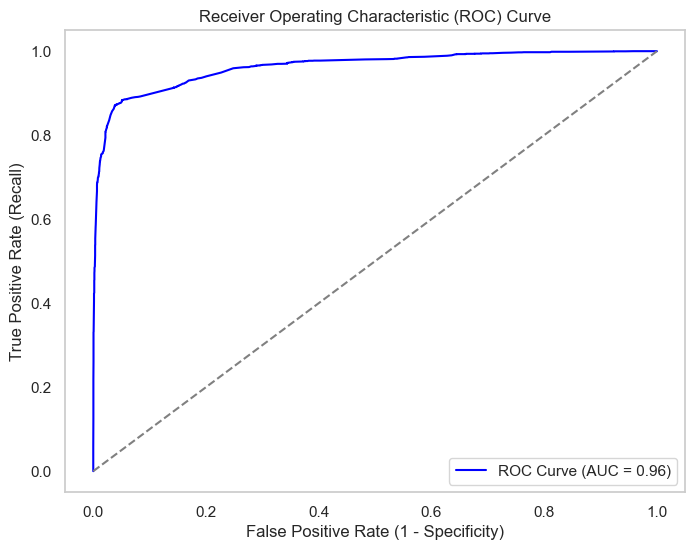

In [490]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predicted probabilities on train set
y_train_pred_probs = y_train_pred_final['Converted_prob']

# Actual values
y_true = y_train_pred_final['Converted']

# ROC Curve values
fpr, tpr, thresholds = roc_curve(y_true, y_train_pred_probs)

# AUC score
auc_score = roc_auc_score(y_true, y_train_pred_probs)
print(f"AUC Score: {auc_score:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()


ROC =0.96 is close to 1. which is a very good value

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [493]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.972139,9067,1,1,1,1,1,1,1,1,1,1,1
1,0,0.269533,6093,0,1,1,1,0,0,0,0,0,0,0
2,1,0.032221,855,0,1,0,0,0,0,0,0,0,0,0
3,0,0.780630,6053,1,1,1,1,1,1,1,1,1,0,0
4,0,0.195845,292,0,1,1,0,0,0,0,0,0,0,0


In [494]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385417  1.000000  0.000000
0.1   0.1  0.808983  0.964900  0.711204
0.2   0.2  0.857549  0.936469  0.808056
0.3   0.3  0.925595  0.873289  0.958398
0.4   0.4  0.925866  0.867322  0.962580
0.5   0.5  0.925731  0.866620  0.962800
0.6   0.6  0.925731  0.866620  0.962800
0.7   0.7  0.914502  0.815374  0.976667
0.8   0.8  0.896645  0.754300  0.985912
0.9   0.9  0.875271  0.687259  0.993176


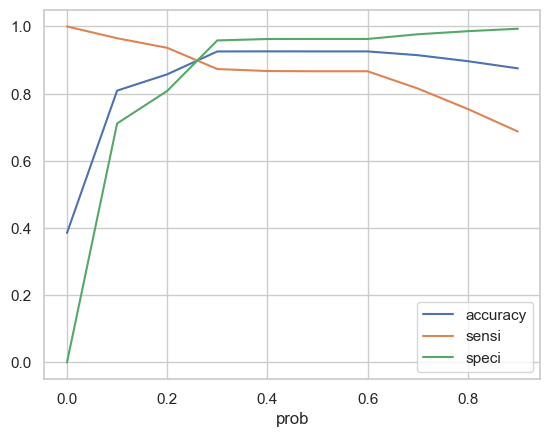

In [495]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [496]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.972139,9067,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.269533,6093,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.032221,855,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.780630,6053,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.195845,292,0,1,1,0,0,0,0,0,0,0,0,0


In [497]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.972139,9067,1,97
1,0,0.269533,6093,0,27
2,1,0.032221,855,0,3
3,0,0.780630,6053,1,78
4,0,0.195845,292,0,20


In [498]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9255952380952381

In [499]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[4354,  189],
       [ 361, 2488]], dtype=int64)

In [500]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [501]:
accuracy  = (TP + TN) / float(TP + TN + FP + FN)
recall    = TP / float(TP + FN)  # Sensitivity
specificity = TN / float(TN + FP)
precision = TP / float(TP + FP)
npv       = TN / float(TN + FN)


# Print all metrics
print(f"Accuracy     : {accuracy:.4f}")
print(f"Sensitivity  : {recall:.4f}")
print(f"Specificity  : {specificity:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"NPV          : {npv:.4f}")


Accuracy     : 0.9256
Sensitivity  : 0.8733
Specificity  : 0.9584
Precision    : 0.9294
NPV          : 0.9234


In [502]:
from sklearn.metrics import precision_score, recall_score

In [503]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.9293985805005603

In [504]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8732888732888733

In [505]:
from sklearn.metrics import precision_recall_curve

In [506]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

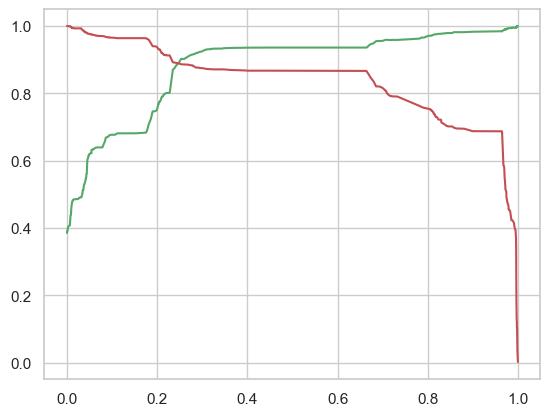

In [507]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [508]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,Engagement_Score,Visit_Page_Ratio,Lead Origin_Landing Page Submission,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
683,0,0,0.918329,1.849956,2.147272,0,1,2.013324,1.326827,1,...,0,0,0,0,1,0,0,0,0,0
1931,0,0,-1.116936,-0.885505,-1.283037,0,0,-1.173684,-1.475444,0,...,0,0,1,0,0,0,0,0,0,0
6950,0,0,-0.438515,-0.322054,-0.139601,0,1,-0.385884,0.704100,1,...,0,0,0,0,0,0,1,0,0,0
2996,0,0,-0.099304,-0.327507,0.432117,0,1,-0.218298,0.976543,1,...,0,0,0,0,0,0,0,0,0,0
3902,0,0,0.239907,-0.460191,1.003835,0,1,-0.150977,1.140009,1,...,0,0,0,0,0,0,0,0,0,0


## PREDICTIONS ON TEST SET

In [611]:
y_test_pred = log_model_fitted.predict(X_test_sm)

In [613]:
y_test_pred[:10]

683     0.175201
1931    0.982075
6950    0.084145
2996    0.002831
3902    0.009301
6828    0.005092
4906    0.679971
5796    0.227756
6388    0.227756
3636    0.036447
dtype: float64

In [615]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
683,0.175201
1931,0.982075
6950,0.084145
2996,0.002831
3902,0.009301


In [617]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [619]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()


,Converted,Prospect ID,0
0,1,683,0.175201
1,1,1931,0.982075
2,0,6950,0.084145
3,0,2996,0.002831
4,0,3902,0.009301


In [621]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [623]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,683,0.175201
1,1,1931,0.982075
2,0,6950,0.084145
3,0,2996,0.002831
4,0,3902,0.009301


In [625]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [627]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,683,1,0.175201,18
1,1931,1,0.982075,98
2,6950,0,0.084145,8
3,2996,0,0.002831,0
4,3902,0,0.009301,1


In [629]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [631]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,683,1,0.175201,18,0
1,1931,1,0.982075,98,1
2,6950,0,0.084145,8,0
3,2996,0,0.002831,0,0
4,3902,0,0.009301,1,0


In [633]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.920995670995671

In [635]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1081,   55],
       [  91,  621]], dtype=int64)

In [637]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [641]:
# Compute metrics
accuracy  = (TP + TN) / float(TP + TN + FP + FN)
recall    = TP / float(TP + FN)  # Sensitivity
specificity = TN / float(TN + FP)
precision = TP / float(TP + FP)
npv       = TN / float(TN + FN)


# Print all metrics
print(f"Accuracy     : {accuracy:.4f}")
print(f"Sensitivity  : {recall:.4f}")
print(f"Specificity  : {specificity:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"NPV          : {npv:.4f}")


Accuracy     : 0.9210
Sensitivity  : 0.8722
Specificity  : 0.9516
Precision    : 0.9186
NPV          : 0.9224


In [643]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.9186390532544378

In [645]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8721910112359551

 Modeling: Logistic Regression (statsmodels)
Final model includes 12 features after RFE + p-value filtering.

Pseudo R² (McFadden) ≈ 0.591 → good model fit.

All retained variables were statistically significant (p < 0.05).

No multicollinearity observed (VIF < 5 for all).

📈 Training Set Performance (at 0.3 cutoff)
Accuracy : 0.9257

Sensitivity : 0.8666 (High Recall)

Specificity : 0.9628

Precision : 0.9359

NPV : 0.9200

 Test Set Performance (at 0.3 cutoff)
Accuracy : 0.9210

Sensitivity : 0.8722

Specificity : 0.9516

Precision : 0.9186

NPV : 0.9224

 Conclusion
The logistic regression model generalizes well on unseen data.

High precision and recall indicate it effectively identifies convertible leads with minimal false positives or negatives.

You can confidently use the model to prioritize high-conversion leads for sales/marketing.